## 1. Setting GPU for processing

In [1]:
import tensorflow as tf
print(tf.__version__)
import keras.backend.tensorflow_backend as tfback

print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus
gpus = tf.compat.v1.config.experimental.list_physical_devices("GPU")
if gpus:
  # Restrict TensorFlow to only allocate 1*X GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=(1024*4))])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)


2.1.0
tf.__version__ is 2.1.0
tf.keras.__version__ is: 2.2.4-tf
Using TensorFlow backend.
1 Physical GPUs, 1 Logical GPUs


# 2.  U Net Model for hair segmentation 

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Dropout, Input, concatenate
from tensorflow.keras.models import Model


In [4]:
def U_NetModel(input_shape):

    X_input = Input(input_shape)

    ######## Down-Sampling Part
    d1 = Conv2D(filters = 16, kernel_size = (3,3), 
                name = "downsamping-1a", padding = "same", 
                kernel_initializer= "he_normal", activation = "relu")(X_input)
    d1 = Dropout(0.1)(d1)
    d1 = Conv2D(filters = 16, kernel_size = (3,3), 
                name = "downsampling-1b", padding = "same", 
                kernel_initializer= "he_normal", activation = "relu")(d1)
    p1 = MaxPooling2D(pool_size= (2,2))(d1)




    d2 = Conv2D(filters = 32, kernel_size = (3,3), 
                name = "downsamping-2a", padding = "same", 
                kernel_initializer= "he_normal", activation = "relu")(p1)
    d2 = Dropout(0.1)(d2)
    d2 = Conv2D(filters = 32, kernel_size = (3,3), 
                name = "downsampling-2b", padding = "same", 
                kernel_initializer= "he_normal", activation = "relu")(d2)
    p2 = MaxPooling2D(pool_size= (2,2))(d2)




    d3 = Conv2D(filters = 64, kernel_size = (3,3), 
                name = "downsamping-3a", padding = "same", 
                kernel_initializer= "he_normal", activation = "relu")(p2)
    d3 = Dropout(0.1)(d3)
    d3 = Conv2D(filters = 64, kernel_size = (3,3), 
                name = "downsampling-3b", padding = "same", 
                kernel_initializer= "he_normal", activation = "relu")(d3)
    p3 = MaxPooling2D(pool_size= (2,2))(d3)





    d4 = Conv2D(filters = 128, kernel_size = (3,3), 
                name = "downsamping-4a", padding = "same", 
                kernel_initializer= "he_normal", activation = "relu")(p3)
    d4 = Dropout(0.1)(d4)
    d4 = Conv2D(filters = 128, kernel_size = (3,3), 
                name = "downsampling-4b", padding = "same", 
                kernel_initializer= "he_normal", activation = "relu")(d4)
    p4 = MaxPooling2D(pool_size= (2,2))(d4)






    d5 = Conv2D(filters = 256, kernel_size = (3,3), 
                name = "downsamping-5a", padding = "same", 
                kernel_initializer= "he_normal", activation = "relu")(p4)
    d5 = Dropout(0.1)(d5)
    d5 = Conv2D(filters = 256, kernel_size = (3,3), 
                name = "downsampling-5b", padding = "same", 
                kernel_initializer= "he_normal", activation = "relu")(d5)
    d5 = Dropout(0.1)(d5)
    d5 = Conv2D(filters = 256, kernel_size = (3,3), 
                name = "downsampling-5c", padding = "same", 
                kernel_initializer= "he_normal", activation = "relu")(d5)
    


    u6 = Conv2DTranspose(filters = 128, kernel_size = (2,2), 
                         strides = (2,2), padding = "same",
                         name = "upsampling-6a")(d5)
    u6 = concatenate([u6, d4])
    c6 = Conv2D(filters = 128, kernel_size = (2,2),
                activation = "relu", padding = 'same',
                kernel_initializer = 'he_normal', name = "upsampling-6b")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(filters = 128, kernel_size = (2,2),
                activation = "relu", padding = 'same',
                kernel_initializer = 'he_normal', name = "upsampling-6c")(c6)

    
    
    
    u7 = Conv2DTranspose(filters = 64, kernel_size = (2,2), 
                         strides = (2,2), padding = "same",
                         name = "upsampling-7a")(c6)
    u7 = concatenate([u7, d3])
    c7 = Conv2D(filters = 64, kernel_size = (2,2),
                activation = "relu", padding = 'same',
                kernel_initializer = 'he_normal', name = "upsampling-7b")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(filters = 64, kernel_size = (2,2),
                activation = "relu", padding = 'same',
                kernel_initializer = 'he_normal', name = "upsampling-7c")(c7)

    

    
    
    u8 = Conv2DTranspose(filters = 32, kernel_size = (2,2), 
                         strides = (2,2), padding = "same",
                         name = "upsampling-8a")(c7)
    u8 = concatenate([u8, d2])
    c8 = Conv2D(filters = 32, kernel_size = (2,2),
                activation = "relu", padding = 'same',
                kernel_initializer = 'he_normal', name = "upsampling-8b")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(filters = 32, kernel_size = (2,2),
                activation = "relu", padding = 'same',
                kernel_initializer = 'he_normal', name = "upsampling-8c")(c8)

    

    
    
    u9 = Conv2DTranspose(filters = 16, kernel_size = (2,2), 
                         strides = (2,2), padding = "same",
                         name = "upsampling-9a")(c8)
    u9 = concatenate([u9, d1])
    c9 = Conv2D(filters = 16, kernel_size = (2,2),
                activation = "relu", padding = 'same',
                kernel_initializer = 'he_normal', name = "upsampling-9b")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(filters = 16, kernel_size = (2,2),
                activation = "relu", padding = 'same',
                kernel_initializer = 'he_normal', name = "upsampling-9c")(c9)



    output = Conv2D(filters = 1, kernel_size = (1,1), name = "output", activation = "sigmoid")(c9)

    model = Model(inputs = [X_input], outputs = [output], name = "U_NET_MODEL")
    
    return model

In [5]:
# Free up RAM in case the model definition cells were run multiple times
tf.keras.backend.clear_session()


model = U_NetModel((256,256,3))
model.summary()

Model: "U_NET_MODEL"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
downsamping-1a (Conv2D)         (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           downsamping-1a[0][0]             
__________________________________________________________________________________________________
downsampling-1b (Conv2D)        (None, 256, 256, 16) 2320        dropout[0][0]                    
________________________________________________________________________________________

# Setting Datagen

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

home_directory = os.path.join(os.getcwd(), 'dataset','hair_data')

train_frame_datagen = ImageDataGenerator(rescale= 1./255,
                                         width_shift_range= 0.2,
                                         height_shift_range= 0.2,
                                         rotation_range= 40,
                                         horizontal_flip= True,
                                         fill_mode = 'nearest',
                                         zoom_range = 0.2,
                                         shear_range = 0.2)

train_label_datagen  = ImageDataGenerator()                                       

test_frame_datagen = ImageDataGenerator(rescale= 1./255)
test_label_datagen  = ImageDataGenerator()                                       

train_frame_generator = train_frame_datagen.flow_from_directory(
                                    os.path.join(home_directory, 'train_frames'),
                                    target_size = (512,512),
                                    batch_size = 20)


train_label_generator = train_label_datagen.flow_from_directory(
                                    os.path.join(home_directory, 'train_masks'),
                                    target_size = (512,512),
                                    batch_size = 20)

test_frame_generator = test_frame_datagen.flow_from_directory(
                                    os.path.join(home_directory, 'val_frames'),
                                    target_size = (512,512),
                                    batch_size = 20)

test_label_generator = test_label_datagen.flow_from_directory(
                                    os.path.join(home_directory, 'val_masks'),
                                    target_size = (512,512),
                                    batch_size = 20)                                


train_generator  = zip(train_frame_generator, train_label_generator)
test_generator = zip(test_frame_generator, test_label_generator)

# 2nd Approach for data

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img_size = (256, 256)
num_classes = 3
batch_size = 32

class HairData(tf.keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = mpimg.imread(path)
            img = cv.resize(img, self.img_size)
            img = img / 255.
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = cv.imread(path, cv.IMREAD_GRAYSCALE)
            img = cv.resize(img, self.img_size)
            img = img / 255.
            img = np.expand_dims(img, -1)
            y[j] = img

        return x, y

In [7]:
home_directory = os.path.join(os.getcwd(), 'dataset','hair_data')

train_frame_path = os.path.join(home_directory, "train_frames",'train')
train_label_path = os.path.join(home_directory,'train_masks','train')
val_frame_path = os.path.join(home_directory,"val_frames",'val')
val_label_path = os.path.join(home_directory,'val_masks','val')

train_frame_name = sorted(
    [
        os.path.join(train_frame_path, fname)
        for fname in os.listdir(train_frame_path)
    ]
)


train_label_name = sorted(
    [
        os.path.join(train_label_path, fname)
        for fname in os.listdir(train_label_path)
    ]
)

val_frame_name = sorted(
    [
        os.path.join(val_frame_path, fname)
        for fname in os.listdir(val_frame_path)
    ]
)


val_label_name = sorted(
    [
        os.path.join(val_label_path, fname)
        for fname in os.listdir(val_label_path)
    ]
)


train_gen = HairData(batch_size, img_size,
                     train_frame_name,
                     train_label_name)

val_gen = HairData(batch_size, img_size,
                   val_frame_name,
                   val_label_name)                     

<class 'numpy.ndarray'>
(256, 256)
(256, 256, 1)


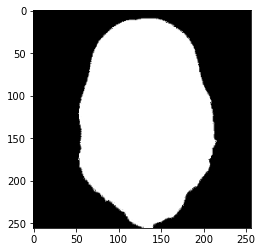

In [8]:
import cv2 as cv
img = cv.imread(train_label_name[0], cv.IMREAD_GRAYSCALE)
img = cv.resize(img, (256, 256))


import matplotlib.pyplot as plt
print(type(img))
print(img.shape)
img = np.expand_dims(img, -1)
print(img.shape)

plt.imshow(img, cmap = "gray")


## TRaining the model

def lrn_rate_decay(epoch):
    if epoch > num_epochs * 0.85:
        learn_rate = 0.00001
    elif epoch > num_epochs * 0.30:
        learn_rate = 0.0001
    else:
        learn_rate = 0.001

    print("leraning rate : {}".format(learn_rate))
    return learn_rate

In [9]:
import keras.backend as K
def castF(x):
    return K.cast(x, K.floatx())

def castB(x):
    return K.cast(x, bool)

def iou_loss_core(true,pred):  #this can be used as a loss if you make it negative
    intersection = true * pred
    notTrue = 1 - true
    union = true + (notTrue * pred)

    return (K.sum(intersection, axis=-1) + K.epsilon()) / (K.sum(union, axis=-1) + K.epsilon())

def competitionMetric2(true, pred): #any shape can go - can't be a loss function

    tresholds = [0.5 + (i*.05)  for i in range(10)]

    #flattened images (batch, pixels)
    true = K.batch_flatten(true)
    pred = K.batch_flatten(pred)
    pred = castF(K.greater(pred, 0.5))

    #total white pixels - (batch,)
    trueSum = K.sum(true, axis=-1)
    predSum = K.sum(pred, axis=-1)

    #has mask or not per image - (batch,)
    true1 = castF(K.greater(trueSum, 1))    
    pred1 = castF(K.greater(predSum, 1))

    #to get images that have mask in both true and pred
    truePositiveMask = castB(true1 * pred1)

    #separating only the possible true positives to check iou
    testTrue = tf.boolean_mask(true, truePositiveMask)
    testPred = tf.boolean_mask(pred, truePositiveMask)

    #getting iou and threshold comparisons
    iou = iou_loss_core(testTrue,testPred) 
    truePositives = [castF(K.greater(iou, tres)) for tres in tresholds]

    #mean of thressholds for true positives and total sum
    truePositives = K.mean(K.stack(truePositives, axis=-1), axis=-1)
    truePositives = K.sum(truePositives)

    #to get images that don't have mask in both true and pred
    trueNegatives = (1-true1) * (1 - pred1) # = 1 -true1 - pred1 + true1*pred1
    trueNegatives = K.sum(trueNegatives) 

    return (truePositives + trueNegatives) / castF(K.shape(true)[0])

In [10]:
tf.compat.v1.enable_eager_execution()
model.compile(optimizer= tf.keras.optimizers.Adam(lr = 0.0001),
              loss = 'binary_crossentropy',
              metrics= [competitionMetric2])

In [24]:
checkpoint_path = 'hair_weights/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                save_best_only= True, 
                                                save_weights_only= True,
                                                verbose = 1,
                                                monitor = 'val_competitionMetric2',
                                                mode = 'max')
                                                

num_epochs = 15

def scheduler(epoch ,lr):
    if epoch > num_epochs * 0.85:
        lr = 0.00001
    elif epoch > num_epochs * 0.30:
        lr = 0.0001
    else:
        lr = 0.001
    print(f"Learning Rate : {lr}")
    return lr

from keras.callbacks import LearningRateScheduler 
learning_rate = LearningRateScheduler(scheduler)                                               

latest = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest)

history = model.fit(
        train_gen, epochs = num_epochs,
        validation_data= val_gen,
        callbacks = [callbacks, learning_rate],
        verbose = 1)




  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 26 steps, validate for 6 steps
Learning Rate : 0.001
Epoch 1/15
25/26 [===========================>..] - ETA: 0s - loss: 0.1287 - competitionMetric2: 0.7618
Epoch 00001: val_competitionMetric2 improved from -inf to 0.67188, saving model to hair_weights/cp.ckpt
26/26 [==============================] - 9s 362ms/step - loss: 0.1309 - competitionMetric2: 0.7603 - val_loss: 0.2041 - val_competitionMetric2: 0.6719
Learning Rate : 0.001
Epoch 2/15
25/26 [===========================>..] - ETA: 0s - loss: 0.1247 - competitionMetric2: 0.7705
Epoch 00002: val_competitionMetric2 improved from 0.67188 to 0.68229, saving model to hair_weights/cp.ckpt
26/26 [==============================] - 9s 344ms/step - loss: 0.1234 - competitionMetric2: 0.7727 - val_loss: 0.2059 - val_competitionMetric2: 0.6823
Learning Rate : 0.001
Epoch 3/15
25/26 [===========================>..] - ETA: 0s - loss: 0.1243 - competitionMetric2: 0.7702
Epoch 00003: val_c

# Prediction

In [35]:
def predict_segmentation(input_img):
    latest = tf.train.latest_checkpoint(checkpoint_dir)
    model.load_weights(latest)
    fig, ax = plt.subplots(2, figsize  = (10, 6))
    img_train = mpimg.imread(input_img)
    img_train = cv.resize(img_train, (256,256))
    plt.imsave('dataset/prediction/img-1.jpg', img_train)
    ax[0].imshow(img_train)
    img_train = img_train / 255.

    img_train = np.expand_dims(img_train, 0)
    predict = model.predict(img_train, verbose = 1)
    prt = (predict > 0.4).astype(np.uint8)
    plt.imsave('dataset/prediction/mask-1.jpg', np.squeeze(prt), cmap = 'gray')
    ax[1].imshow(np.squeeze(prt), cmap = 'gray')
    plt.show()


1/1 [==============================] - 0s 264ms/sample


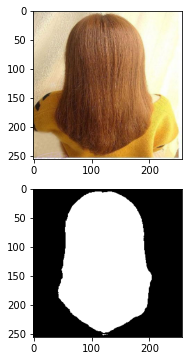

In [36]:
predict_segmentation(os.path.join(val_frame_path, 'Frame00010.jpg'))

model.save('model/hair_segmentation.h5')

## Applying color to mask

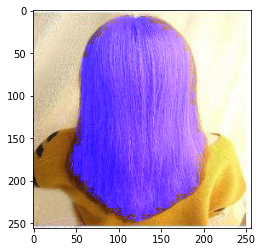

In [27]:
imgfile = 'dataset/prediction/img-1.jpg'
maskfile = 'dataset/prediction/mask-1.jpg'

img = cv.imread(imgfile ,1)
mask = cv.imread(maskfile , 0)

image, contours, heirarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours, 0, (0,0,255), 1)

img = img [:,:,::-1] # BGR to RGB
img[...,2] = np.where(mask == 255, 255, img[...,2])
plt.imsave("dataset/prediction/output.jpg", img)
plt.imshow(img)
plt.show()

In [29]:
model.save('hair_weights/hair_unet.h5')

In [34]:
model = tf.keras.models.load_model('hair_weights/hair_unet.h5', custom_objects={'competitionMetric2': competitionMetric2})